## Zoe Markovits - Data Mining Project Two
## Predicting Students' Academic Performance

### Importing, Cleaning, and Exploratory Data Analysis

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
pd.set_option('display.max_columns', 500)
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Data Mining/Project Two/Student_Academic_Performance.csv')
print(df.shape)
print(df.info())

(480, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB
None


In [3]:
# Cleaning column names

df.rename(columns={'gender':'Gender',
                   'NationalITy':'Nationality',
                   'PlaceofBirth':'Place_of_Birth',
                   'StageID':'Education_Level',
                   'GradeID':'Grade_Level',
                   'SectionID':'Section_ID',
                   'Relation':'Parent',
                   'raisedhands':'Raised_Hand',
                   'VisITedResources':'Visited_Resources',
                   'AnnouncementsView':'Viewed_Announcements',
                   'Discussion':'Discussion_Groups',
                   'ParentAnsweringSurvey':'Parent_Answered_Survey',
                   'ParentschoolSatisfaction':'Parent_School_Satisfaction',
                   'StudentAbsenceDays':'Absences',
                   'Class':'Performance'}, inplace=True)

#Reordering columns

df = df[['Performance','Gender','Nationality','Place_of_Birth','Education_Level','Grade_Level','Section_ID','Topic',\
         'Semester','Parent','Raised_Hand','Visited_Resources','Viewed_Announcements','Discussion_Groups',\
         'Parent_Answered_Survey','Parent_School_Satisfaction','Absences']]

In [4]:
df.Performance.value_counts()

M    211
H    142
L    127
Name: Performance, dtype: int64

In [5]:
df.describe()

,Raised_Hand,Visited_Resources,Viewed_Announcements,Discussion_Groups
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
from pandas_profiling import ProfileReport as pfr
pfr(df)

Number of variables,17
Number of observations,480
Total Missing (%),0.0%
Total size in memory,63.8 KiB
Average record size in memory,136.2 B
Numeric,4
Categorical,13
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [7]:
# Cleaning column values: 

df['Education_Level'] = df['Education_Level'].map({'MiddleSchool': 'Middle_School',
                                                   'lowerlevel': 'Elementary_School', 
                                                   'HighSchool':'High_School'})

df['Grade_Level'] = df['Grade_Level'].map({'G-02':'Grade_Two',
                                           'G-08':'Grade_Eight',
                                           'G-07':'Grade_Seven',
                                           'G-04':'Grade_Four',
                                           'G-06':'Grade_Six',
                                           'G-11':'Grade_Eleven',
                                           'G-12':'Grade_Twelve',
                                           'G-09':'Grade_Nine',
                                           'G-10':'Grade_Ten',
                                           'G-05':'Grade_Five'})

df['Nationality'] = df['Nationality'].map({'KW':'Kuwait',
                                           'Jordan':'Jordan',
                                           'Palestine':'Palestine',
                                           'Iraq':'Iraq',
                                           'lebanon':'Lebanon',
                                           'Tunis':'Tunis',
                                           'SaudiArabia':'Saudi_Arabia',
                                           'Egypt':'Egypt',
                                           'Syria':'Syria',
                                           'Iran':'Iran',
                                           'USA':'USA',
                                           'Lybia':'Libya',
                                           'Morocco':'Morocco',
                                           'venzuela':'Venezuela'})

df['Parent'] = df['Parent'].map({'Father':'Father',
                                 'Mum':'Mother'})

df['Place_of_Birth'] = df['Place_of_Birth'].map({'KuwaIT':'Kuwait',
                                                 'Jordan':'Jordan',
                                                 'Iraq':'Iraq',
                                                 'lebanon':'Lebanon',
                                                 'USA':'USA',
                                                 'SaudiArabia':'Saudi_Arabia',
                                                 'Palestine':'Palestine',
                                                 'Tunis':'Tunis',
                                                 'Egypt':'Egypt',
                                                 'Syria':'Syria',
                                                 'Iran':'Iran',
                                                 'Lybia':'Libya',
                                                 'Morocco':'Morocco',
                                                 'venzuela':'Venezuela'})

df['Performance'] = df['Performance'].map({'L':'Low',
                                           'M':'Medium',
                                           'H':'High'})

df['Gender'] = df['Gender'].map({'M':'Male',
                                 'F':'Female'})

df['Semester'] = df['Semester'].map({'F':'First',
                                     'S':'Second'})

df['Absences'] = df['Absences'].map({'Under-7':'Under_Seven',
                                     'Above-7':'Over_Seven'})

In [8]:
# Creating dummy variables:

gender_dummies = pd.get_dummies(df.Gender,drop_first=False).astype(int)
nationality_dummies = pd.get_dummies(df.Nationality,drop_first=False).astype(int)
pob_dummies = pd.get_dummies(df.Place_of_Birth,drop_first=False).astype(int)
education_dummies = pd.get_dummies(df.Education_Level,drop_first=False).astype(int)
grade_dummies = pd.get_dummies(df.Grade_Level,drop_first=False).astype(int)
section_dummies = pd.get_dummies(df.Section_ID,drop_first=False).astype(int)
topic_dummies = pd.get_dummies(df.Topic,drop_first=False).astype(int)
semester_dummies = pd.get_dummies(df.Semester,drop_first=False).astype(int)
parent_dummies = pd.get_dummies(df.Parent,drop_first=False).astype(int)
parent_answer_dummies = pd.get_dummies(df.Parent_Answered_Survey,drop_first=False).astype(int)
parent_satisfy_dummies = pd.get_dummies(df.Parent_School_Satisfaction,drop_first=False).astype(int)
absence_dummies = pd.get_dummies(df.Absences,drop_first=False).astype(int)

df = pd.concat([df,gender_dummies,nationality_dummies,pob_dummies,education_dummies,grade_dummies,section_dummies, \
                topic_dummies,semester_dummies,parent_dummies,parent_answer_dummies,parent_satisfy_dummies, \
                absence_dummies],axis=1)           

In [9]:
print(df.shape)
df.head(10)

(480, 85)


,Performance,Gender,Nationality,Place_of_Birth,Education_Level,Grade_Level,Section_ID,Topic,Semester,Parent,Raised_Hand,Visited_Resources,Viewed_Announcements,Discussion_Groups,Parent_Answered_Survey,Parent_School_Satisfaction,Absences,Female,Male,Egypt,Iran,Iraq,Jordan,Kuwait,Lebanon,Libya,Morocco,Palestine,Saudi_Arabia,Syria,Tunis,USA,Venezuela,Egypt,Iran,Iraq,Jordan,Kuwait,Lebanon,Libya,Morocco,Palestine,Saudi_Arabia,Syria,Tunis,USA,Venezuela,Elementary_School,High_School,Middle_School,Grade_Eight,Grade_Eleven,Grade_Five,Grade_Four,Grade_Nine,Grade_Seven,Grade_Six,Grade_Ten,Grade_Twelve,Grade_Two,A,B,C,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish,First,Second,Father,Mother,No,Yes,Bad,Good,Over_Seven,Under_Seven
0,Medium,Male,Kuwait,Kuwait,Elementary_School,Grade_Four,A,IT,First,Father,15,16,2,20,Yes,Good,Under_Seven,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1
1,Medium,Male,Kuwait,Kuwait,Elementary_School,Grade_Four,A,IT,First,Father,20,20,3,25,Yes,Good,Under_Seven,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1
2,Low,Male,Kuwait,Kuwait,Elementary_School,Grade_Four,A,IT,First,Father,10,7,0,30,No,Bad,Over_Seven,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
3,Low,Male,Kuwait,Kuwait,Elementary_School,Grade_Four,A,IT,First,Father,30,25,5,35,No,Bad,Over_Seven,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
4,Medium,Male,Kuwait,Kuwait,Elementary_School,Grade_Four,A,IT,First,Father,40,50,12,50,No,Bad,Over_Seven,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
5,Medium,Female,Kuwait,Kuwait,Elementary_School,Grade_Four,A,IT,First,Father,42,30,13,70,Yes,Bad,Over_Seven,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0
6,Low,Male,Kuwait,Kuwait,Middle_School,Grade_Seven,A,Math,First,Father,35,12,0,17,No,Bad,Over_Seven,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
7,Medium,Male,Kuwait,Kuwait,Middle_School,Grade_Seven,A,Math,First,Father,50,10,15,22,Yes,Good,Under_Seven,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1
8,Medium,Female,Kuwait,Kuwait,Middle_School,Grade_Seven,A,Math,First,Father,12,21,16,50,Yes,Good,Under_Seven,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1
9,Medium,Female,Kuwait,Kuwait,Middle_School,Grade_Seven,B,IT,First,Father,70,80,25,70,Yes,Good,Under_Seven,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1


In [10]:
df.groupby('Gender').Performance.value_counts()

Gender  Performance
Female  Medium          76
        High            75
        Low             24
Male    Medium         135
        Low            103
        High            67
Name: Performance, dtype: int64

In [11]:
df.groupby('Parent').Performance.value_counts()

Parent  Performance
Father  Medium         137
        Low            104
        High            42
Mother  High           100
        Medium          74
        Low             23
Name: Performance, dtype: int64

### Classification

In [54]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

#### Baseline Algorithms

In [55]:
X = df.drop(['Performance','Gender','Nationality','Place_of_Birth','Education_Level','Grade_Level','Section_ID',\
             'Topic','Semester','Parent','Parent_Answered_Survey','Parent_School_Satisfaction','Absences'], axis=1)
y = df['Performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Naive Bayes

In [56]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
GNB_predict = GNB.predict(X_test)

GNB_accuracy = accuracy_score(y_test, GNB_predict)
GNB_precision = precision_score(y_test, GNB_predict, average='macro')
GNB_recall = recall_score(y_test, GNB_predict, average='macro')
GNB_f1 = f1_score(y_test, GNB_predict, average='macro')

print(GNB_accuracy)
print(GNB_precision)
print(GNB_recall)
print(GNB_f1)

0.5208333333333334
0.5367805034471701
0.5914309982632964
0.5301203277009728


In [57]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, GNB_predict))

Confusion Matrix:
 [[23  3 23]
 [ 0 23  3]
 [12 28 29]]


In [58]:
print("Classification Report:\n", metrics.classification_report(y_test, GNB_predict))

Classification Report:
               precision    recall  f1-score   support

        High       0.66      0.47      0.55        49
         Low       0.43      0.88      0.57        26
      Medium       0.53      0.42      0.47        69

   micro avg       0.52      0.52      0.52       144
   macro avg       0.54      0.59      0.53       144
weighted avg       0.55      0.52      0.51       144



K-Nearest Neighbors

In [59]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
KNN_predict = KNN.predict(X_test)

KNN_accuracy = accuracy_score(y_test, KNN_predict)
KNN_precision = precision_score(y_test, KNN_predict, average='macro')
KNN_recall = recall_score(y_test, KNN_predict, average='macro')
KNN_f1 = f1_score(y_test, KNN_predict, average='macro')

print(KNN_accuracy)
print(KNN_precision)
print(KNN_recall)
print(KNN_f1)

0.6180555555555556
0.6147435897435898
0.6509718714687659
0.6216119058983388


In [60]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, KNN_predict))

Confusion Matrix:
 [[27  3 19]
 [ 0 21  5]
 [13 15 41]]


In [61]:
print("Classification Report:\n", metrics.classification_report(y_test, KNN_predict))

Classification Report:
               precision    recall  f1-score   support

        High       0.68      0.55      0.61        49
         Low       0.54      0.81      0.65        26
      Medium       0.63      0.59      0.61        69

   micro avg       0.62      0.62      0.62       144
   macro avg       0.61      0.65      0.62       144
weighted avg       0.63      0.62      0.62       144



Logistic Regression

In [62]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
LogReg_predict = LogReg.predict(X_test)

LogReg_accuracy = accuracy_score(y_test, LogReg_predict)
LogReg_precision = precision_score(y_test, LogReg_predict, average='macro')
LogReg_recall = recall_score(y_test, LogReg_predict, average='macro')
LogReg_f1 = f1_score(y_test, LogReg_predict, average='macro')

print(LogReg_accuracy)
print(LogReg_precision)
print(LogReg_recall)
print(LogReg_f1)

0.7361111111111112
0.7288546826857986
0.7828020840443202
0.7447916666666666


In [63]:
features = zip(list(LogReg.coef_[0]), X.columns)
sorted(features, key=lambda x: x[0], reverse=True)

[(1.1233163266164161, 'Biology'),
 (1.108621783100127, 'Under_Seven'),
 (0.8845527620038879, 'Math'),
 (0.7906795452493314, 'Saudi_Arabia'),
 (0.5598096325022212, 'Chemistry'),
 (0.4429300843098198, 'Iraq'),
 (0.4429300843098198, 'Iraq'),
 (0.39648435354008876, 'Grade_Eleven'),
 (0.38902242343998, 'USA'),
 (0.19338914333337806, 'Mother'),
 (0.14808518571400786, 'English'),
 (0.1335254500783017, 'Grade_Six'),
 (0.11564450237366679, 'Venezuela'),
 (0.11564450237366679, 'Venezuela'),
 (0.09771748164231506, 'Tunis'),
 (0.09749253798873006, 'Grade_Four'),
 (0.022269033924842703, 'Visited_Resources'),
 (0.015059992980161013, 'Raised_Hand'),
 (0.005337660996979885, 'Discussion_Groups'),
 (0.00498003926910513, 'Viewed_Announcements'),
 (-0.002525605995924512, 'Grade_Five'),
 (-0.004725473620205408, 'Syria'),
 (-0.004725473620205408, 'Syria'),
 (-0.00626382353207882, 'USA'),
 (-0.03375422942665702, 'Kuwait'),
 (-0.034377263788032526, 'Elementary_School'),
 (-0.04954942227278704, 'Yes'),
 (-0.04

In [64]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, LogReg_predict))

Confusion Matrix:
 [[36  0 13]
 [ 0 25  1]
 [11 13 45]]


In [65]:
print("Classification Report:\n", metrics.classification_report(y_test, LogReg_predict))

Classification Report:
               precision    recall  f1-score   support

        High       0.77      0.73      0.75        49
         Low       0.66      0.96      0.78        26
      Medium       0.76      0.65      0.70        69

   micro avg       0.74      0.74      0.74       144
   macro avg       0.73      0.78      0.74       144
weighted avg       0.74      0.74      0.73       144



Decision Tree

In [66]:
DecisionTree = DecisionTreeClassifier(max_depth=5)
DecisionTree.fit(X_train,y_train)
DecisionTree_predict = DecisionTree.predict(X_test)

DecisionTree_accuracy = accuracy_score(y_test, DecisionTree_predict)
DecisionTree_precision = precision_score(y_test, DecisionTree_predict, average='macro')
DecisionTree_recall = recall_score(y_test, DecisionTree_predict, average='macro')
DecisionTree_f1 = f1_score(y_test, DecisionTree_predict, average='macro')

print(DecisionTree_accuracy)
print(DecisionTree_precision)
print(DecisionTree_recall)
print(DecisionTree_f1)

0.7430555555555556
0.7520483684369008
0.741769617546015
0.744292633557435


In [67]:
features = zip(list(DecisionTree.feature_importances_), X.columns)
sorted(features, key=lambda x: x[0], reverse=True)

[(0.3073100719423619, 'Under_Seven'),
 (0.24617964715832888, 'Visited_Resources'),
 (0.11089411203625556, 'Raised_Hand'),
 (0.09380743354280995, 'Viewed_Announcements'),
 (0.06355674116705388, 'Discussion_Groups'),
 (0.035107288073292046, 'Grade_Two'),
 (0.03326924268763579, 'Father'),
 (0.029220139760764072, 'Saudi_Arabia'),
 (0.028887538275326242, 'Tunis'),
 (0.013829808607741897, 'History'),
 (0.012343961401951447, 'C'),
 (0.011260728610225323, 'High_School'),
 (0.010809538422125538, 'Egypt'),
 (0.003523748314127583, 'Grade_Six'),
 (0.0, 'Female'),
 (0.0, 'Male'),
 (0.0, 'Egypt'),
 (0.0, 'Iran'),
 (0.0, 'Iraq'),
 (0.0, 'Jordan'),
 (0.0, 'Kuwait'),
 (0.0, 'Lebanon'),
 (0.0, 'Libya'),
 (0.0, 'Morocco'),
 (0.0, 'Palestine'),
 (0.0, 'Syria'),
 (0.0, 'USA'),
 (0.0, 'Venezuela'),
 (0.0, 'Iran'),
 (0.0, 'Iraq'),
 (0.0, 'Jordan'),
 (0.0, 'Kuwait'),
 (0.0, 'Lebanon'),
 (0.0, 'Libya'),
 (0.0, 'Morocco'),
 (0.0, 'Palestine'),
 (0.0, 'Saudi_Arabia'),
 (0.0, 'Syria'),
 (0.0, 'Tunis'),
 (0.0, 'US

In [68]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, DecisionTree_predict))

Confusion Matrix:
 [[33  0 16]
 [ 0 20  6]
 [ 8  7 54]]


In [69]:
print("Classification Report:\n", metrics.classification_report(y_test, DecisionTree_predict))

Classification Report:
               precision    recall  f1-score   support

        High       0.80      0.67      0.73        49
         Low       0.74      0.77      0.75        26
      Medium       0.71      0.78      0.74        69

   micro avg       0.74      0.74      0.74       144
   macro avg       0.75      0.74      0.74       144
weighted avg       0.75      0.74      0.74       144



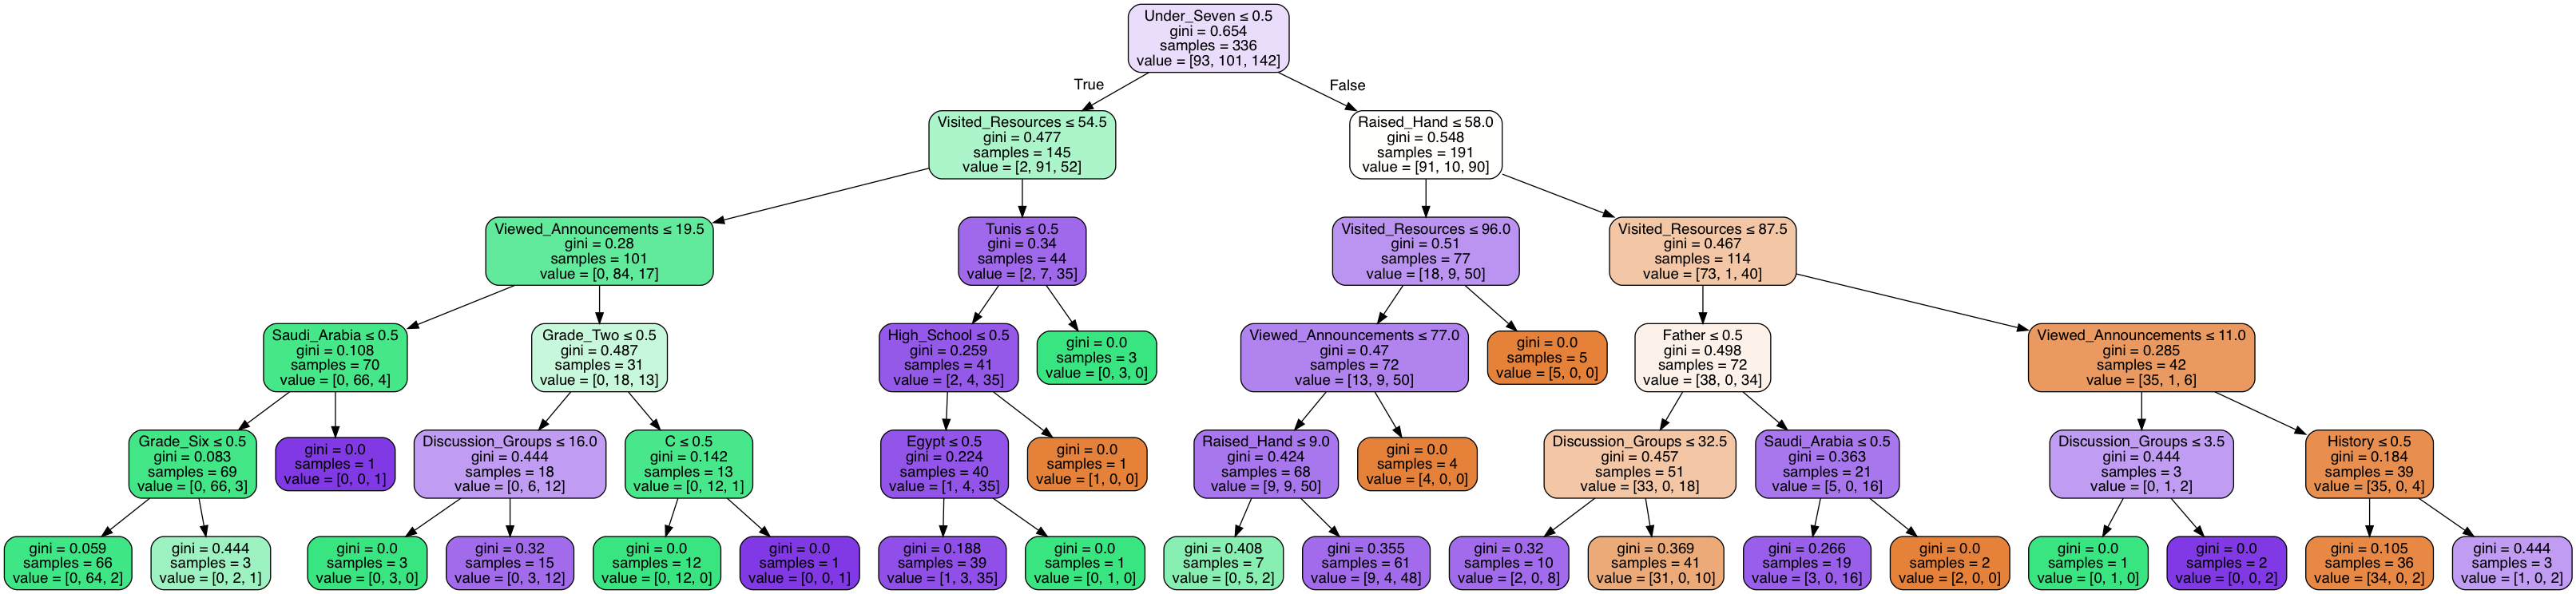

In [70]:
dot_data = StringIO()  
export_graphviz(DecisionTree, out_file=dot_data,  
                    feature_names=X.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Random Forest

In [71]:
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train,y_train)
RandomForest_predict = RandomForest.predict(X_test)

RandomForest_accuracy = accuracy_score(y_test, RandomForest_predict)
RandomForest_precision = precision_score(y_test, RandomForest_predict, average='macro')
RandomForest_recall = recall_score(y_test, RandomForest_predict, average='macro')
RandomForest_f1 = f1_score(y_test, RandomForest_predict, average='macro')

print(RandomForest_accuracy)
print(RandomForest_precision)
print(RandomForest_recall)
print(RandomForest_f1)

0.7847222222222222
0.7840270611168444
0.8027135045768586
0.7843156435966415


In [72]:
features= zip(list(RandomForest.feature_importances_), X.columns)
sorted(features, key=lambda x: x[0], reverse=True)

[(0.12387720262583794, 'Raised_Hand'),
 (0.11270851698738142, 'Visited_Resources'),
 (0.1001599654255714, 'Over_Seven'),
 (0.07856528125238924, 'Viewed_Announcements'),
 (0.06546465885962419, 'Discussion_Groups'),
 (0.06272040728661046, 'Under_Seven'),
 (0.048808535572674484, 'No'),
 (0.03259028867026202, 'Yes'),
 (0.027918272793386274, 'Bad'),
 (0.025499764638743, 'Mother'),
 (0.018882748698422512, 'A'),
 (0.017740624809753365, 'Female'),
 (0.015216473048706436, 'Jordan'),
 (0.01470701212398654, 'Father'),
 (0.014683324061966277, 'Grade_Two'),
 (0.014125553840645158, 'Male'),
 (0.01261165322217469, 'Jordan'),
 (0.011489311527471152, 'Kuwait'),
 (0.011385153806206142, 'Good'),
 (0.010493731245549007, 'Grade_Eight'),
 (0.009473385311820825, 'B'),
 (0.009290797113505618, 'Middle_School'),
 (0.008699578378518246, 'IT'),
 (0.008485298512805774, 'Second'),
 (0.007952469253245229, 'Chemistry'),
 (0.006822881554336052, 'Elementary_School'),
 (0.006818375745165771, 'Biology'),
 (0.006450585307

In [73]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, RandomForest_predict))

Confusion Matrix:
 [[33  2 14]
 [ 0 24  2]
 [ 5  8 56]]


In [74]:
print("Classification Report:\n", metrics.classification_report(y_test, RandomForest_predict))

Classification Report:
               precision    recall  f1-score   support

        High       0.87      0.67      0.76        49
         Low       0.71      0.92      0.80        26
      Medium       0.78      0.81      0.79        69

   micro avg       0.78      0.78      0.78       144
   macro avg       0.78      0.80      0.78       144
weighted avg       0.80      0.78      0.78       144



Support Vector Machine

In [75]:
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train,y_train)
SVM_predict = SVM.predict(X_test)

SVM_accuracy = accuracy_score(y_test, SVM_predict)
SVM_precision = precision_score(y_test, SVM_predict, average='macro')
SVM_recall = recall_score(y_test, SVM_predict, average='macro')
SVM_f1 = f1_score(y_test, SVM_predict, average='macro')

print(SVM_accuracy)
print(SVM_precision)
print(SVM_recall)
print(SVM_f1)

0.7708333333333334
0.7698412698412698
0.8030130669882224
0.7799033893924404


In [76]:
features = zip(list(SVM.coef_[0]), X.columns)
sorted(features, key=lambda x: x[0], reverse=True)

[(0.9475386839913083, 'Under_Seven'),
 (0.6382286554625465, 'Female'),
 (0.4359947972839391, 'Palestine'),
 (0.4359947972839391, 'Grade_Six'),
 (0.4333331351702403, 'Saudi_Arabia'),
 (0.4333331351702403, 'Geology'),
 (0.3562746020544121, 'Yes'),
 (0.32870501855157097, 'Grade_Four'),
 (0.3079805685036967, 'Good'),
 (0.22538312212922357, 'Math'),
 (0.2108435981860431, 'English'),
 (0.2104697279270947, 'C'),
 (0.14553971473519733, 'Elementary_School'),
 (0.14325880420592862, 'Biology'),
 (0.1428087247808973, 'French'),
 (0.059096783646275464, 'Second'),
 (0.044220604861344825, 'Spanish'),
 (0.024902947587577273, 'Viewed_Announcements'),
 (0.020102255697452165, 'Visited_Resources'),
 (0.01310168877469664, 'Discussion_Groups'),
 (0.005528723671035962, 'Kuwait'),
 (0.005528723671035962, 'Kuwait'),
 (0.004132068377998621, 'Raised_Hand'),
 (0.0003622905081359651, 'Mother'),
 (0.0, 'Iran'),
 (0.0, 'Iraq'),
 (0.0, 'Lebanon'),
 (0.0, 'Libya'),
 (0.0, 'Morocco'),
 (0.0, 'Saudi_Arabia'),
 (0.0, 'Sy

In [77]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, SVM_predict))

Confusion Matrix:
 [[34  0 15]
 [ 0 25  1]
 [ 8  9 52]]


In [78]:
print("Classification Report:\n", metrics.classification_report(y_test, SVM_predict))

Classification Report:
               precision    recall  f1-score   support

        High       0.81      0.69      0.75        49
         Low       0.74      0.96      0.83        26
      Medium       0.76      0.75      0.76        69

   micro avg       0.77      0.77      0.77       144
   macro avg       0.77      0.80      0.78       144
weighted avg       0.77      0.77      0.77       144



AdaBoost

In [79]:
AdaBoost = AdaBoostClassifier()
AdaBoost.fit(X_train,y_train)
AdaBoost_predict = AdaBoost.predict(X_test)

AdaBoost_accuracy = accuracy_score(y_test, AdaBoost_predict)
AdaBoost_precision = precision_score(y_test, AdaBoost_predict, average='macro')
AdaBoost_recall = recall_score(y_test, AdaBoost_predict, average='macro')
AdaBoost_f1 = f1_score(y_test, AdaBoost_predict, average='macro')

print(AdaBoost_accuracy)
print(AdaBoost_precision)
print(AdaBoost_recall)
print(AdaBoost_f1)

0.6597222222222222
0.6653826399589111
0.6937600012134174
0.6762820512820512


In [80]:
features = zip(list(AdaBoost.feature_importances_), X.columns)
sorted(features, key=lambda x: x[0], reverse=True)

[(0.2, 'Visited_Resources'),
 (0.16, 'Viewed_Announcements'),
 (0.12, 'Raised_Hand'),
 (0.1, 'Over_Seven'),
 (0.08, 'Chemistry'),
 (0.08, 'Under_Seven'),
 (0.06, 'Discussion_Groups'),
 (0.06, 'Yes'),
 (0.02, 'Egypt'),
 (0.02, 'Grade_Eight'),
 (0.02, 'IT'),
 (0.02, 'Math'),
 (0.02, 'Mother'),
 (0.02, 'Bad'),
 (0.02, 'Good'),
 (0.0, 'Female'),
 (0.0, 'Male'),
 (0.0, 'Egypt'),
 (0.0, 'Iran'),
 (0.0, 'Iraq'),
 (0.0, 'Jordan'),
 (0.0, 'Kuwait'),
 (0.0, 'Lebanon'),
 (0.0, 'Libya'),
 (0.0, 'Morocco'),
 (0.0, 'Palestine'),
 (0.0, 'Saudi_Arabia'),
 (0.0, 'Syria'),
 (0.0, 'Tunis'),
 (0.0, 'USA'),
 (0.0, 'Venezuela'),
 (0.0, 'Iran'),
 (0.0, 'Iraq'),
 (0.0, 'Jordan'),
 (0.0, 'Kuwait'),
 (0.0, 'Lebanon'),
 (0.0, 'Libya'),
 (0.0, 'Morocco'),
 (0.0, 'Palestine'),
 (0.0, 'Saudi_Arabia'),
 (0.0, 'Syria'),
 (0.0, 'Tunis'),
 (0.0, 'USA'),
 (0.0, 'Venezuela'),
 (0.0, 'Elementary_School'),
 (0.0, 'High_School'),
 (0.0, 'Middle_School'),
 (0.0, 'Grade_Eleven'),
 (0.0, 'Grade_Five'),
 (0.0, 'Grade_Four'),
 (

In [81]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, AdaBoost_predict))

Confusion Matrix:
 [[34  1 14]
 [ 0 21  5]
 [21  8 40]]


In [82]:
print("Classification Report:\n", metrics.classification_report(y_test, AdaBoost_predict))

Classification Report:
               precision    recall  f1-score   support

        High       0.62      0.69      0.65        49
         Low       0.70      0.81      0.75        26
      Medium       0.68      0.58      0.63        69

   micro avg       0.66      0.66      0.66       144
   macro avg       0.67      0.69      0.68       144
weighted avg       0.66      0.66      0.66       144



GradientBoost

In [83]:
GradientBoost = GradientBoostingClassifier()
GradientBoost.fit(X_train,y_train)
GradientBoost_predict = GradientBoost.predict(X_test)

GradientBoost_accuracy = accuracy_score(y_test, GradientBoost_predict)
GradientBoost_precision = precision_score(y_test, GradientBoost_predict, average='macro')
GradientBoost_recall = recall_score(y_test, GradientBoost_predict, average='macro')
GradientBoost_f1 = f1_score(y_test, GradientBoost_predict, average='macro')

print(GradientBoost_accuracy)
print(GradientBoost_precision)
print(GradientBoost_recall)
print(GradientBoost_f1)

0.7291666666666666
0.735960960960961
0.7481893537794159
0.7381242353152465


In [84]:
features = zip(list(GradientBoost.feature_importances_), X.columns)
sorted(features, key=lambda x: x[0], reverse=True)

[(0.3068416355447469, 'Visited_Resources'),
 (0.12896694017089066, 'Raised_Hand'),
 (0.11185060335005526, 'Under_Seven'),
 (0.10312976179724827, 'Viewed_Announcements'),
 (0.09958336030036588, 'Over_Seven'),
 (0.06119024091696711, 'Discussion_Groups'),
 (0.01588344467583413, 'Saudi_Arabia'),
 (0.015401081138610656, 'Father'),
 (0.010289030113662083, 'No'),
 (0.009804289079472804, 'Yes'),
 (0.007913170443401795, 'History'),
 (0.007709364455791305, 'Grade_Eight'),
 (0.007399580196719421, 'Tunis'),
 (0.006960197788943767, 'Grade_Six'),
 (0.0066890200274371415, 'Elementary_School'),
 (0.005093218379767066, 'Mother'),
 (0.005088111369256952, 'Math'),
 (0.005062900579028958, 'Bad'),
 (0.004272751334614693, 'Kuwait'),
 (0.004180262860088622, 'Chemistry'),
 (0.0040722411843274785, 'Arabic'),
 (0.003967156377285953, 'English'),
 (0.003904494432063886, 'Male'),
 (0.0036165668976625752, 'Kuwait'),
 (0.0035302447439394375, 'Iraq'),
 (0.0035176314782533113, 'Egypt'),
 (0.0034289096008998567, 'A'),


In [85]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, GradientBoost_predict))

Confusion Matrix:
 [[29  2 18]
 [ 0 23  3]
 [11  5 53]]


In [86]:
print("Classification Report:\n", metrics.classification_report(y_test, GradientBoost_predict))

Classification Report:
               precision    recall  f1-score   support

        High       0.72      0.59      0.65        49
         Low       0.77      0.88      0.82        26
      Medium       0.72      0.77      0.74        69

   micro avg       0.73      0.73      0.73       144
   macro avg       0.74      0.75      0.74       144
weighted avg       0.73      0.73      0.73       144



Model Evaluation

In [87]:
model_evaluation = pd.DataFrame({
    'Model': ['KNN','Naive Bayes','SVM','Logistic Regression','Decision Tree','Random Forest',\
              'AdaBoost','Gradient Boost'],
    'Accuracy Score': [KNN_accuracy,GNB_accuracy,SVM_accuracy,LogReg_accuracy,DecisionTree_accuracy,\
                       RandomForest_accuracy,AdaBoost_accuracy,GradientBoost_accuracy]})
model_evaluation.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
5,Random Forest,0.784722
2,SVM,0.770833
4,Decision Tree,0.743056
3,Logistic Regression,0.736111
7,Gradient Boost,0.729167
6,AdaBoost,0.659722
0,KNN,0.618056
1,Naive Bayes,0.520833


In [88]:
model_evaluation = pd.DataFrame({
    'Model': ['KNN','Naive Bayes','SVM','Logistic Regression','Decision Tree','Random Forest',\
              'AdaBoost','Gradient Boost'],
    'Precision Score': [KNN_precision,GNB_precision,SVM_precision,LogReg_precision,DecisionTree_precision,\
                        RandomForest_precision,AdaBoost_precision,GradientBoost_precision]})
model_evaluation.sort_values(by='Precision Score', ascending=False)

,Model,Precision Score
5,Random Forest,0.784027
2,SVM,0.769841
4,Decision Tree,0.752048
7,Gradient Boost,0.735961
3,Logistic Regression,0.728855
6,AdaBoost,0.665383
0,KNN,0.614744
1,Naive Bayes,0.536781


In [89]:
model_evaluation = pd.DataFrame({
    'Model': ['KNN','Naive Bayes','SVM','Logistic Regression','Decision Tree','Random Forest',\
              'AdaBoost','Gradient Boost'],
    'Recall Score': [KNN_recall,GNB_recall,SVM_recall,LogReg_recall,DecisionTree_recall,RandomForest_recall,\
                     AdaBoost_recall,GradientBoost_recall]})
model_evaluation.sort_values(by='Recall Score', ascending=False)

,Model,Recall Score
2,SVM,0.803013
5,Random Forest,0.802714
3,Logistic Regression,0.782802
7,Gradient Boost,0.748189
4,Decision Tree,0.741770
6,AdaBoost,0.693760
0,KNN,0.650972
1,Naive Bayes,0.591431


In [90]:
model_evaluation = pd.DataFrame({
    'Model': ['KNN','Naive Bayes','SVM','Logistic Regression','Decision Tree','Random Forest',\
              'AdaBoost','Gradient Boost'],
    'F-1 Score': [KNN_f1,GNB_f1,SVM_f1,LogReg_f1,DecisionTree_f1,RandomForest_f1,AdaBoost_f1,GradientBoost_f1]})
model_evaluation.sort_values(by='F-1 Score', ascending=False)

,Model,F-1 Score
5,Random Forest,0.784316
2,SVM,0.779903
3,Logistic Regression,0.744792
4,Decision Tree,0.744293
7,Gradient Boost,0.738124
6,AdaBoost,0.676282
0,KNN,0.621612
1,Naive Bayes,0.530120


In [91]:
df_report = pd.read_csv('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Data Mining/Project Two/Student_Confusion_Matrix.csv')
df_report.head()

,Evaluation Metrics,KNN,Naive Bayes,Logistic Regression,Decision Tree,Random Forest,SVM,AdaBoost,GradientBoost
0,Accuracy,0.618056,0.520833,0.736111,0.743056,0.784722,0.770833,0.659722,0.729167
1,Precision,0.614744,0.536781,0.728855,0.752048,0.784027,0.769841,0.665383,0.735961
2,Recall,0.650972,0.591431,0.782802,0.741770,0.802714,0.803013,0.693760,0.748189
3,F1,0.621612,0.530120,0.744792,0.744293,0.784316,0.779903,0.676282,0.738124


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

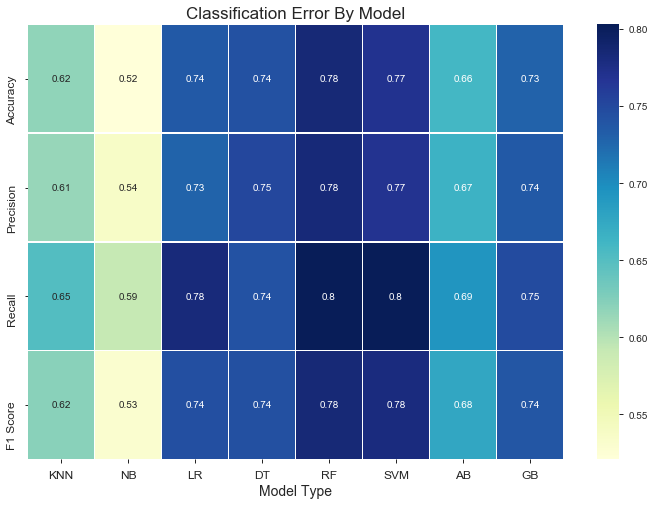

In [94]:
plt.subplots(figsize=(12, 8))

xticks = ['KNN','NB','LR','DT','RF','SVM','AB','GB']
yticks = ['Accuracy','Precision','Recall','F1 Score']

sns.heatmap(df_report[['KNN','Naive Bayes','Logistic Regression','Decision Tree','Random Forest','SVM','AdaBoost','GradientBoost']],\
            annot=True, linewidths=.5, yticklabels=yticks, xticklabels=xticks, cmap="YlGnBu")

plt.title('Classification Error By Model', fontsize=17)
plt.xlabel('Model Type', fontsize=14)
plt.xticks(rotation=0, fontsize=12) 
plt.yticks(fontsize=12)

We can see that the best two models are Random Forest and SVM.

We can also see that for every model, our recall score is our highest metric so we will focus on trying to increase the recall score for our best models.

#### Optimizing Algorithms

Because Random Forest is our strongest model we will choose to optimize it by tuning our hyperparameters.

First, we look at the number of n_estimators, or the number of trees we're using.

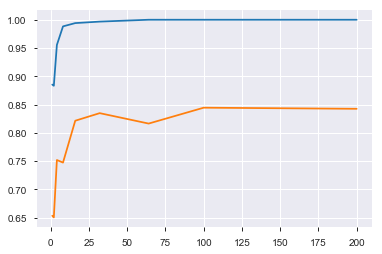

In [95]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
    RandomForest1 = RandomForestClassifier(n_estimators=estimator)
    RandomForest1.fit(X_train,y_train)
    
    Train_Predict = RandomForest1.predict(X_train)
    Test_Predict = RandomForest1.predict(X_test)
    
    Train_Recall = recall_score(y_train, Train_Predict, average='macro')
    Test_Recall = recall_score(y_test, Test_Predict, average='macro')
    train_results.append(Train_Recall)
    test_results.append(Test_Recall)
    
line1, = plt.plot(n_estimators, train_results)
line2, = plt.plot(n_estimators, test_results)
plt.show()

This shows us that after 32 trees our recall score tends to decrease and/or flatten out.

Next, we look at the max-depth of each tree.

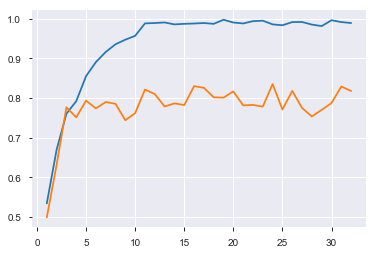

In [96]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results2 = []
test_results2 = []

for max_depth in max_depths:
    RandomForest2 = RandomForestClassifier(max_depth=max_depth)
    RandomForest2.fit(X_train,y_train)
    
    Train_Predict2 = RandomForest2.predict(X_train)
    Test_Predict2 = RandomForest2.predict(X_test)
    
    Train_Recall2 = recall_score(y_train, Train_Predict2, average='macro')
    Test_Recall2 = recall_score(y_test, Test_Predict2, average='macro')
    train_results2.append(Train_Recall2)
    test_results2.append(Test_Recall2)
    
line1, = plt.plot(max_depths, train_results2)
line2, = plt.plot(max_depths, test_results2)
plt.show()   

We can see that as max depth increases our model overfits, thus we settle on a max depth of 6.

Next we look at our min_sample_split, or the minimum number of samples required to split an internal node

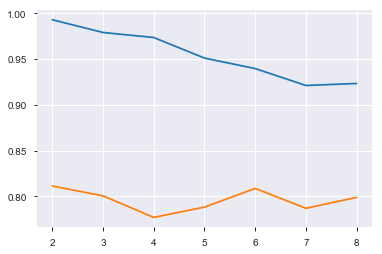

In [97]:
min_samples_splits = [2, 3, 4, 5, 6, 7, 8]
train_results3 = []
test_results3 = []

for min_samples_split in min_samples_splits:
    RandomForest3 = RandomForestClassifier(min_samples_split=min_samples_split)
    RandomForest3.fit(X_train,y_train)
    
    Train_Predict3 = RandomForest3.predict(X_train)
    Test_Predict3 = RandomForest3.predict(X_test)
    
    Train_Recall3 = recall_score(y_train, Train_Predict3, average='macro')
    Test_Recall3 = recall_score(y_test, Test_Predict3, average='macro')
    train_results3.append(Train_Recall3)
    test_results3.append(Test_Recall3)
    
line1, = plt.plot(min_samples_splits, train_results3)
line2, = plt.plot(min_samples_splits, test_results3)
plt.show()

Next we look at our min_samples_leaf, or the minimum number of samples required to be at a leaf node

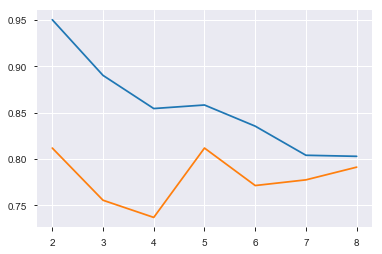

In [98]:
min_samples_leafs = [2, 3, 4, 5, 6, 7, 8]
train_results4 = []
test_results4 = []

for min_samples_leaf in min_samples_leafs:
    RandomForest4 = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    RandomForest4.fit(X_train,y_train)
    
    Train_Predict4 = RandomForest4.predict(X_train)
    Test_Predict4 = RandomForest4.predict(X_test)
    
    Train_Recall4 = recall_score(y_train, Train_Predict4, average='macro')
    Test_Recall4 = recall_score(y_test, Test_Predict4, average='macro')
    train_results4.append(Train_Recall4)
    test_results4.append(Test_Recall4)
    
line1, = plt.plot(min_samples_leafs, train_results4)
line2, = plt.plot(min_samples_leafs, test_results4)
plt.show()

Now we run our random forest again with our newly tuned parameters.

In [102]:
RandomForest_tuned = RandomForestClassifier(n_jobs=-1,n_estimators=32,max_depth=6,min_samples_split=6,min_samples_leaf=5)
RandomForest_tuned.fit(X_train,y_train)
RandomForest_predict = RandomForest_tuned.predict(X_test)

RandomForest_accuracy = accuracy_score(y_test, RandomForest_predict)
RandomForest_precision = precision_score(y_test, RandomForest_predict, average='macro')
RandomForest_recall = recall_score(y_test, RandomForest_predict, average='macro')
RandomForest_f1 = f1_score(y_test, RandomForest_predict, average='macro')

print(RandomForest_accuracy)
print(RandomForest_precision)
print(RandomForest_recall)
print(RandomForest_f1)

0.8194444444444444
0.820705227298752
0.8407730985370737
0.8254515599343186


In [103]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, RandomForest_predict))

Confusion Matrix:
 [[36  0 13]
 [ 0 25  1]
 [ 5  7 57]]


In [104]:
print("Classification Report:\n", metrics.classification_report(y_test, RandomForest_predict))

Classification Report:
               precision    recall  f1-score   support

        High       0.88      0.73      0.80        49
         Low       0.78      0.96      0.86        26
      Medium       0.80      0.83      0.81        69

   micro avg       0.82      0.82      0.82       144
   macro avg       0.82      0.84      0.83       144
weighted avg       0.82      0.82      0.82       144



In [105]:
features= zip(list(RandomForest.feature_importances_), X.columns)
sorted(features, key=lambda x: x[0], reverse=True)

[(0.12387720262583794, 'Raised_Hand'),
 (0.11270851698738142, 'Visited_Resources'),
 (0.1001599654255714, 'Over_Seven'),
 (0.07856528125238924, 'Viewed_Announcements'),
 (0.06546465885962419, 'Discussion_Groups'),
 (0.06272040728661046, 'Under_Seven'),
 (0.048808535572674484, 'No'),
 (0.03259028867026202, 'Yes'),
 (0.027918272793386274, 'Bad'),
 (0.025499764638743, 'Mother'),
 (0.018882748698422512, 'A'),
 (0.017740624809753365, 'Female'),
 (0.015216473048706436, 'Jordan'),
 (0.01470701212398654, 'Father'),
 (0.014683324061966277, 'Grade_Two'),
 (0.014125553840645158, 'Male'),
 (0.01261165322217469, 'Jordan'),
 (0.011489311527471152, 'Kuwait'),
 (0.011385153806206142, 'Good'),
 (0.010493731245549007, 'Grade_Eight'),
 (0.009473385311820825, 'B'),
 (0.009290797113505618, 'Middle_School'),
 (0.008699578378518246, 'IT'),
 (0.008485298512805774, 'Second'),
 (0.007952469253245229, 'Chemistry'),
 (0.006822881554336052, 'Elementary_School'),
 (0.006818375745165771, 'Biology'),
 (0.006450585307

We settle on an accuracy score of 82%, a precision score of 82%, a recall score of 84%, and an F-1 score of 83%  

We can also see that our strongest features are how many times a student visited course resources, how many times a student raised their hand, and if they were absent over seven times. 

### Exporting Algorithm for Web Application

In [108]:
import pickle

with open('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Data Mining/Project Two/RF.pkl', 'wb') as f:
    pickle.dump(RandomForest_tuned, f)

In [117]:
with open('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Data Mining/Project Two/RF.pkl', 'rb') as f:
    RF = pickle.load(f)
    
print(RF.score(X_train,y_train))
print(RF.score(X_test,y_test))

0.8422619047619048
0.8194444444444444
